In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns

In [2]:
csv_merge = "../Resources/merged2014.csv"
df_2014 = pd.read_csv(csv_merge)
df_2014.head()

,Unnamed: 0,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,...,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,Cluster-Group,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2,2014,Europe & Central Asia,SE,SWE,3,Sweden,83.70,100,67,...,91,53,4,High capacity,14,0.82250,0.60784,0.70078,0.8802,0.88656
1,3,2014,Europe & Central Asia,FR,FRA,4,France,80.21,91,75,...,60,79,5,High capacity,4,0.89384,0.96078,1.00000,0.8812,0.80029
2,4,2014,East Asia & Pacific,NZ,NZL,4,New Zealand,80.01,81,76,...,0,67,14,High capacity,9,0.86436,0.78431,0.84251,1.0000,0.75057
3,5,2014,Europe & Central Asia,NL,NLD,6,Netherlands,75.79,95,79,...,26,46,13,High capacity,5,0.88966,1.00000,0.92913,0.9224,0.81751
4,6,2014,Europe & Central Asia,NO,NOR,7,Norway,74.59,88,70,...,17,48,8,High capacity,13,0.83572,0.68627,0.75590,0.9380,0.81328


In [13]:
csv_merge = "../Resources/merged2016.csv"
df_2016 = pd.read_csv(csv_merge)
df_2016.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364


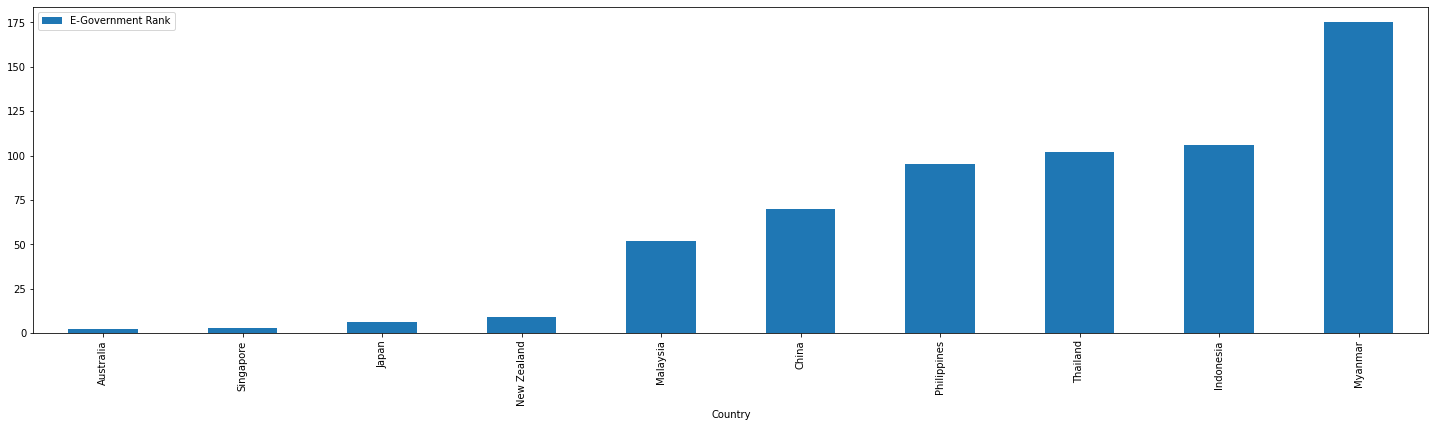

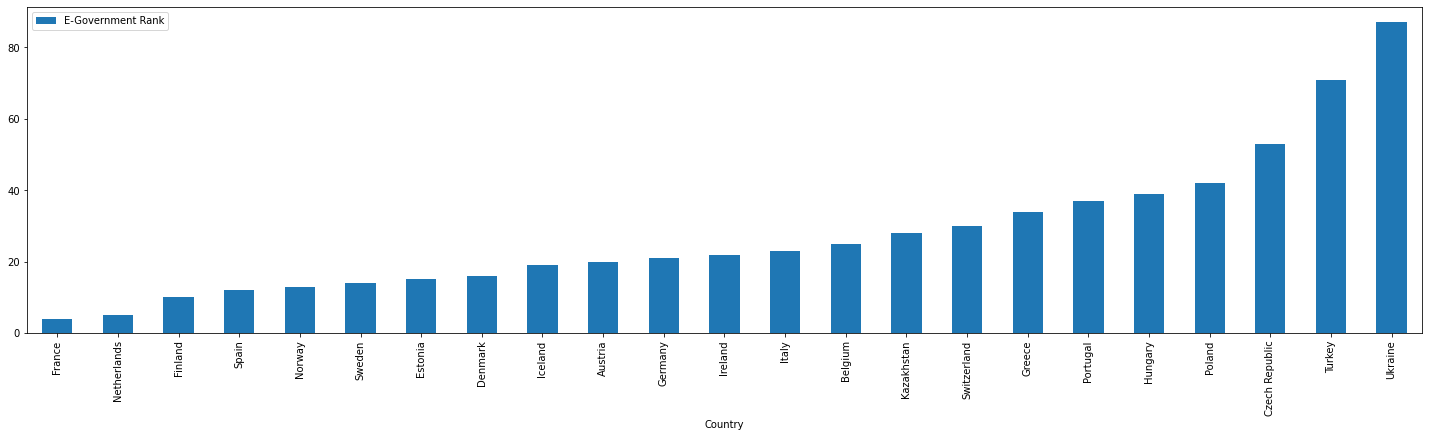

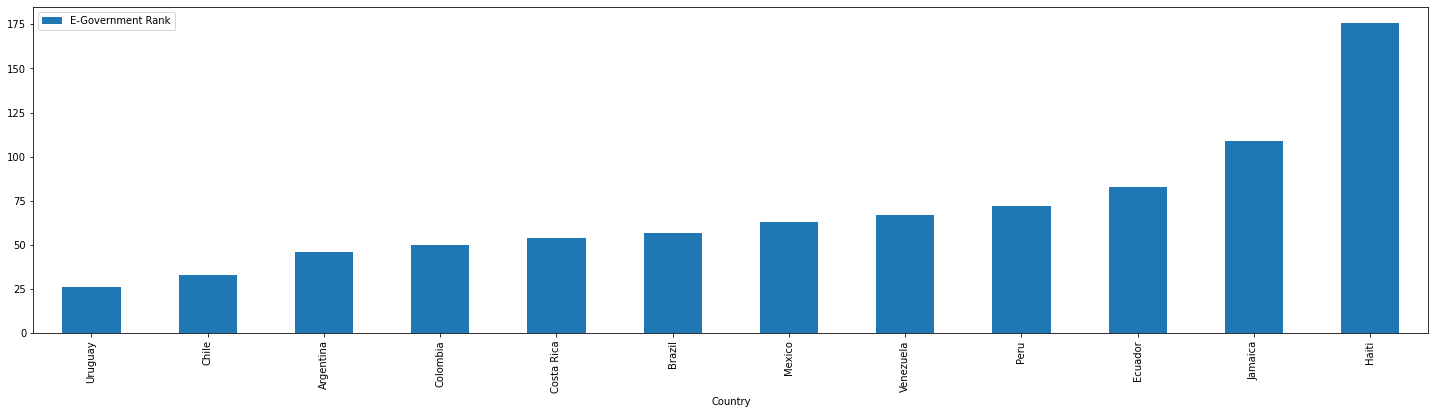

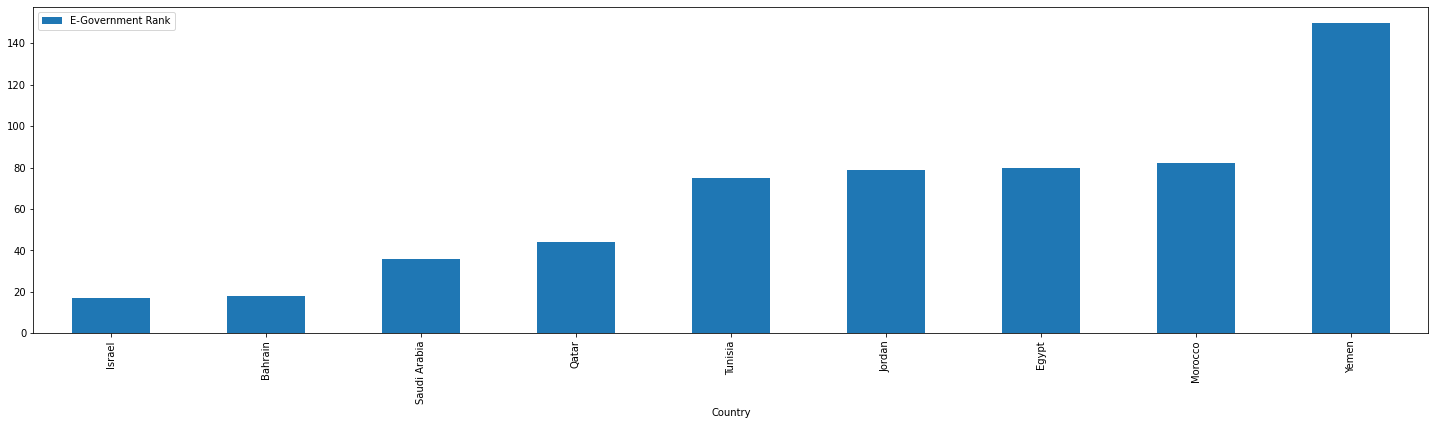

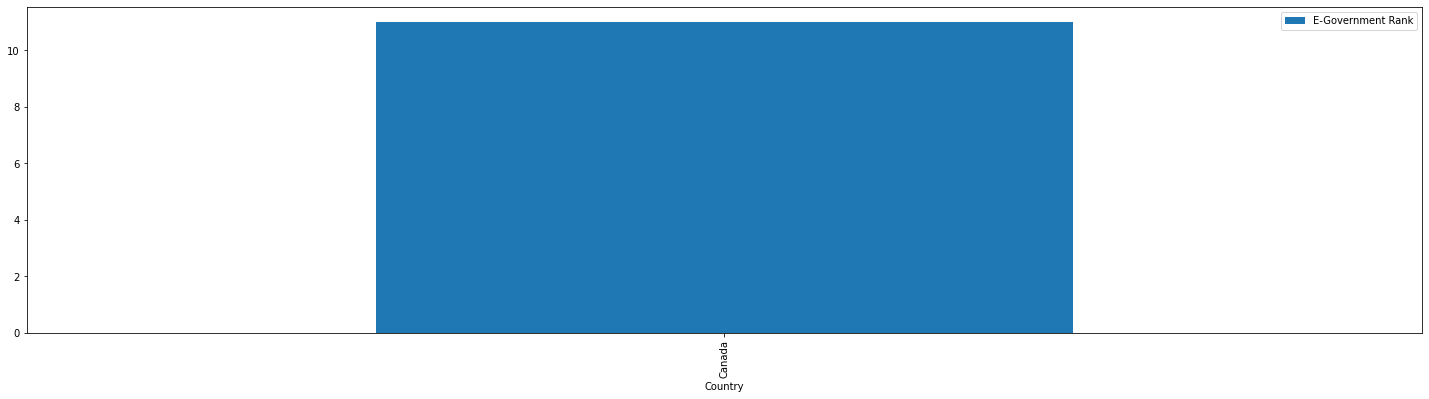

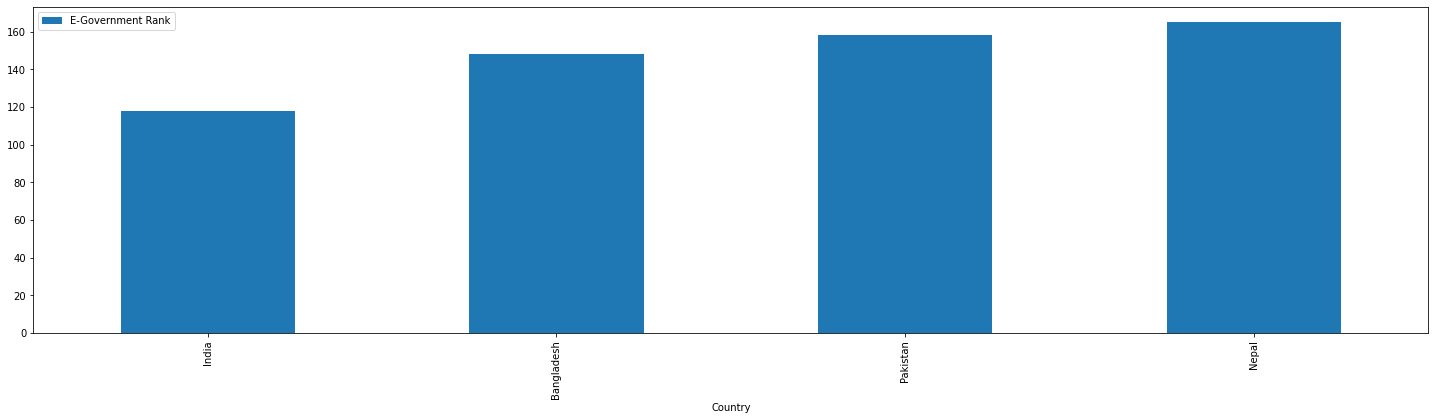

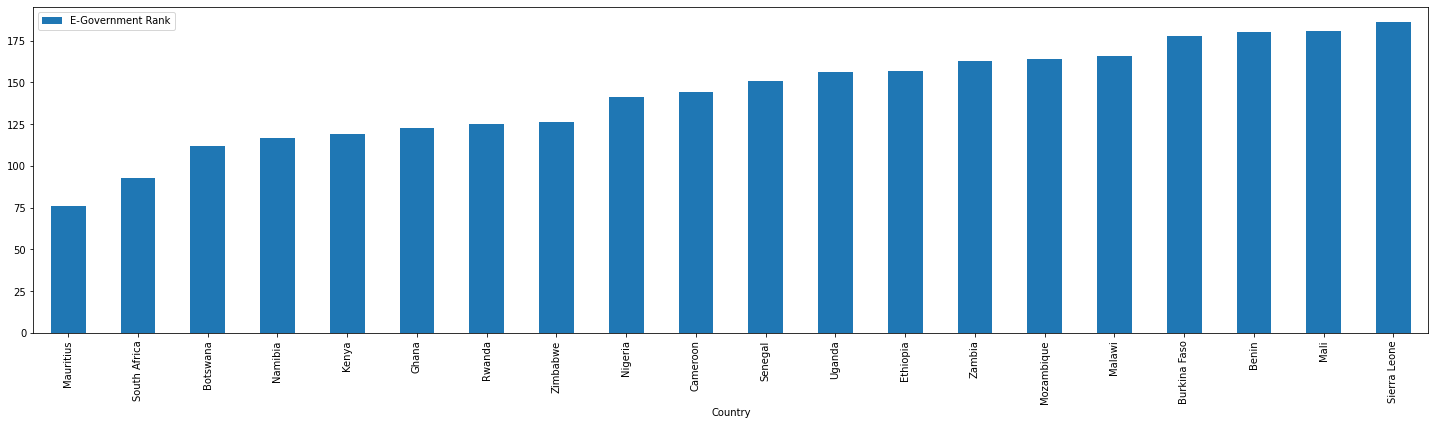

In [12]:
df_2014_sorted = df_2014.sort_values(by = "E-Government Rank")
df_2014_grouped = df_2014_sorted.groupby('Region')
df_2014_grouped.plot.bar(x='Country',y='E-Government Rank',rot=90, figsize=(25,6));

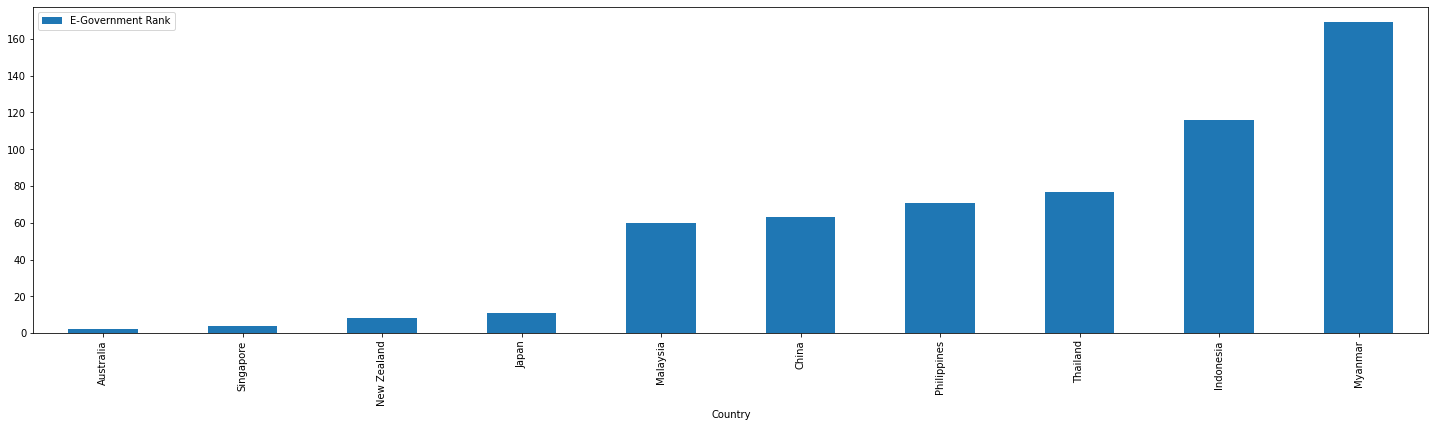

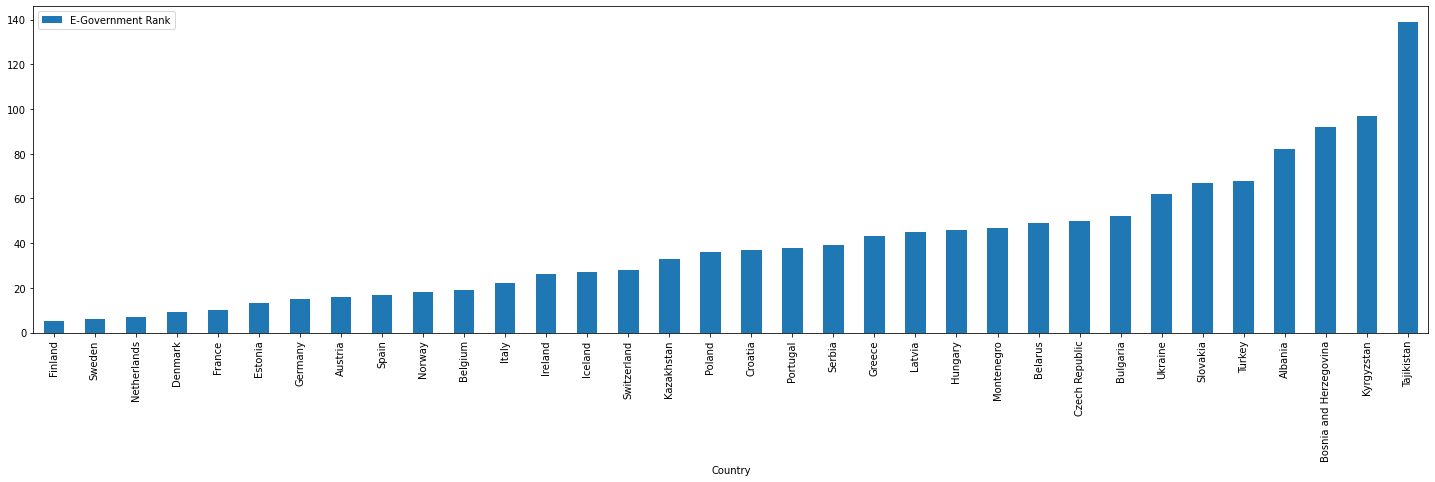

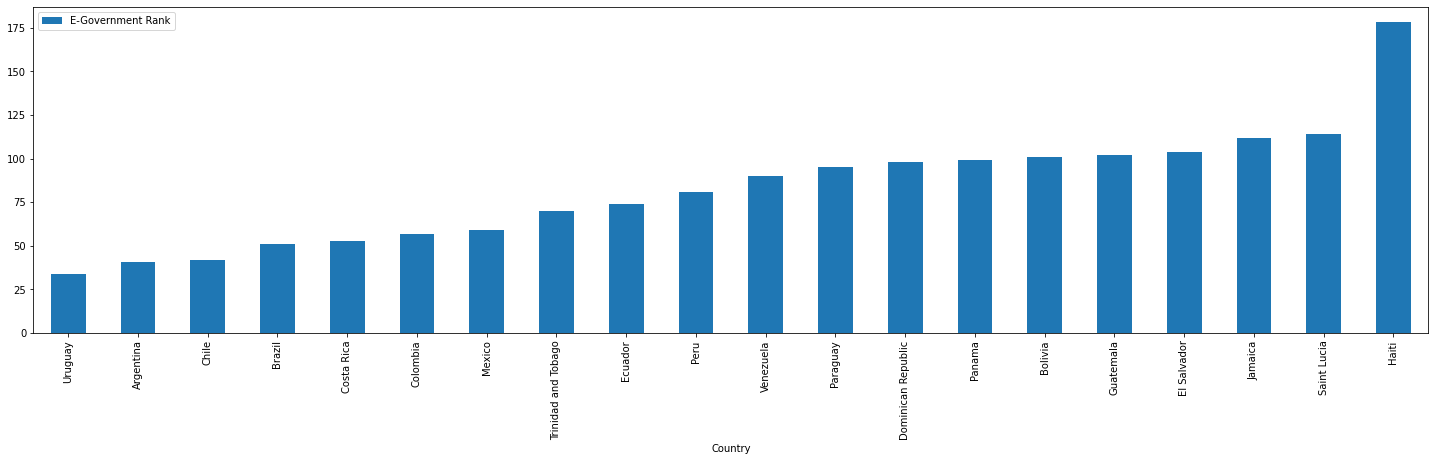

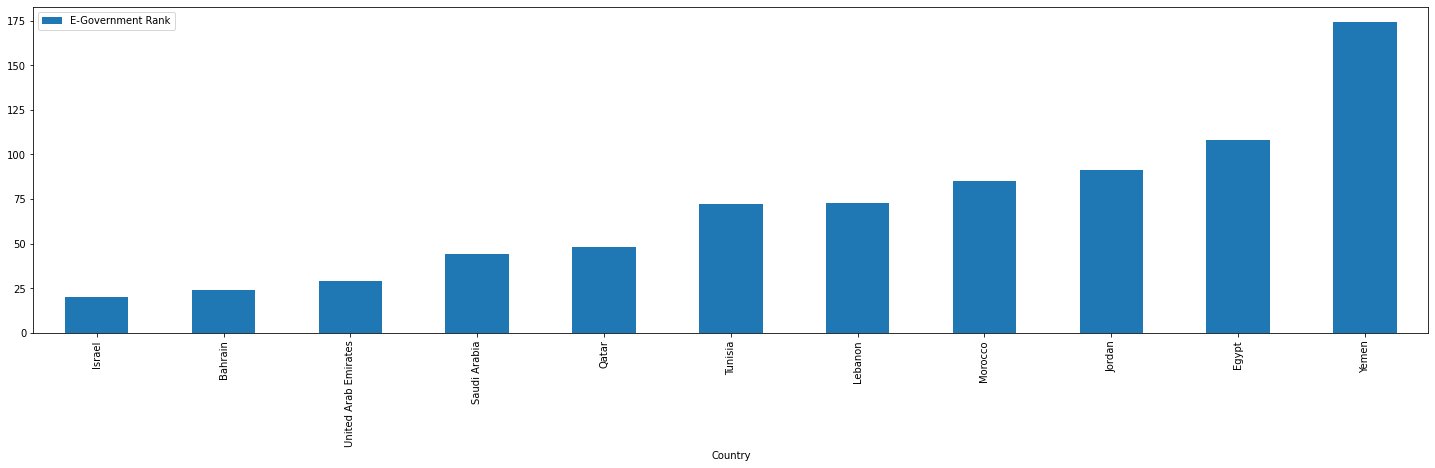

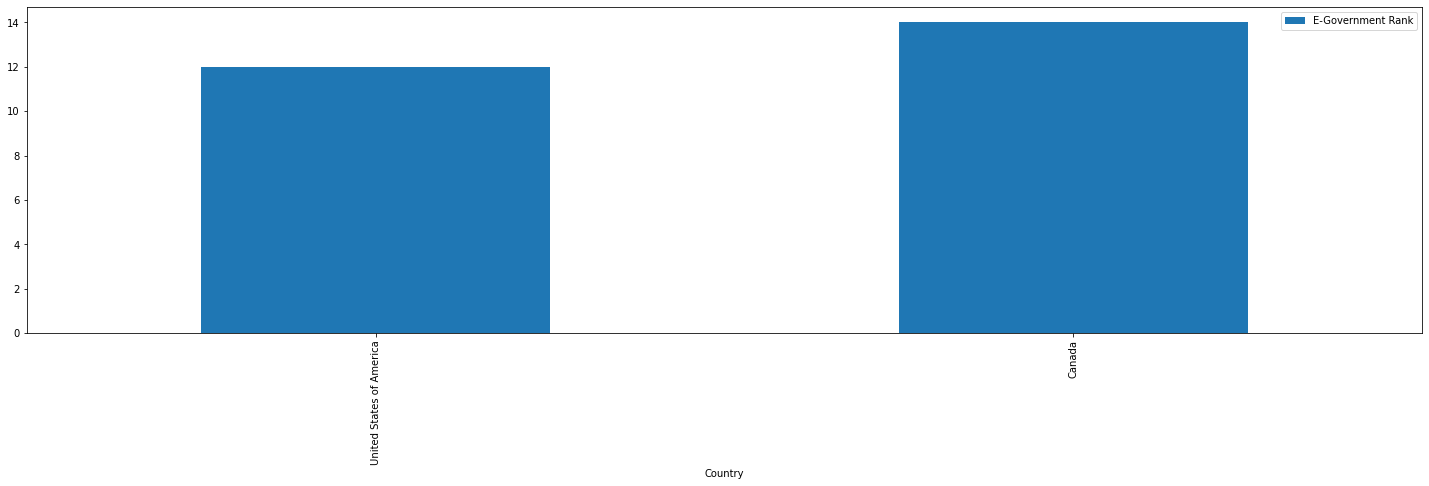

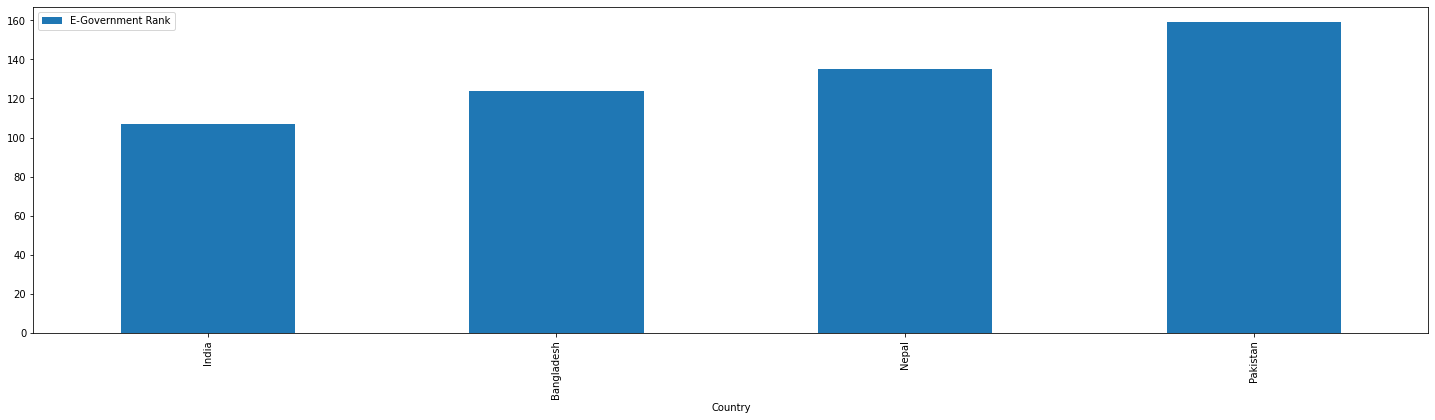

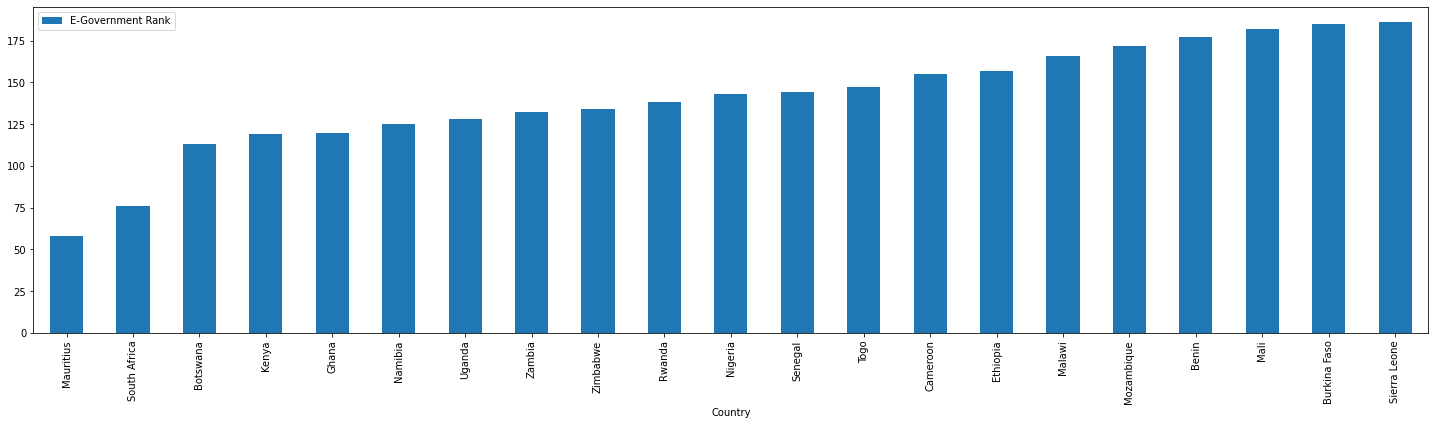

In [14]:
df_2016_sorted = df_2016.sort_values(by = "E-Government Rank")
df_2016_grouped = df_2016_sorted.groupby('Region')
df_2016_grouped.plot.bar(x='Country',y='E-Government Rank',rot=90, figsize=(25,6));

In [23]:
df_2016_sorted = df_2016.sort_values(by = "ODB-Rank")
df_2016_grouped = df_2016_sorted.groupby('Region')
#df_2016_grouped.plot.bar(x='Country',y='ODB-Rank',rot=90, figsize=(25,6));

In [22]:
df_2016_grouped.head()

,Year,Region,ISO2,ISO3,ODB-Rank,Country,ODB-Score-Scaled,Readiness-Scaled,Implementation-Innovation-Scaled,Implementation-Social-Scaled,...,Impact-Political-Scaled,Impact-Social-Scaled,Impact-Economic-Scaled,Impact-Rank,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2016,North America,CA,CAN,2,Canada,89.54,96,87,66,...,63,90,43,8,14,0.82847,0.91525,0.95652,0.85717,0.67173
1,2016,Europe & Central Asia,FR,FRA,3,France,85.13,100,77,70,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,2016,North America,US,USA,4,United States of America,81.62,96,84,63,...,55,70,62,9,12,0.84201,0.89831,0.92754,0.88155,0.71696
3,2016,East Asia & Pacific,AU,AUS,5,Australia,81.15,85,79,76,...,45,75,61,11,2,0.91428,0.98305,0.97826,1.00000,0.76459
4,2016,East Asia & Pacific,NZ,NZL,7,New Zealand,79.38,92,53,63,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
5,2016,East Asia & Pacific,JP,JPN,8,Japan,75.16,84,67,60,...,82,80,51,4,11,0.84397,0.98305,0.87681,0.82738,0.82771
6,2016,Europe & Central Asia,NL,NLD,8,Netherlands,74.95,94,59,63,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
7,2016,Europe & Central Asia,NO,NOR,10,Norway,73.81,77,86,70,...,92,20,58,13,18,0.81168,0.76271,0.80435,0.90306,0.72764
8,2016,Europe & Central Asia,ES,ESP,11,Spain,73.36,81,60,61,...,56,40,100,7,17,0.81350,0.93220,0.91304,0.87821,0.64926
9,2016,Latin America & Caribbean,MX,MEX,11,Mexico,73.45,83,58,58,...,100,60,51,6,59,0.61953,0.88136,0.84783,0.69934,0.31143
